In [1]:
1

1

In [2]:
from core.imports import *

/usr/local/lib/python3.6/dist-packages/OpenSSL/crypto.py:8: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography and will be removed in a future release.
  from cryptography import utils, x509


In [3]:
import seaborn as sns
sns.set_palette(sns.color_palette())

In [4]:
from core.sigir.grid_search import load_trials, build_runs_df

In [5]:
sigir_data_dir = fs.join(ETL_PATH, job_name, 'SIGIR-ecom-data-challenge')
trials_dir = fs.join(sigir_data_dir, 'trials')

In [6]:
hr_metrics = [    
    'val_next_sku_descr_prec_at_1', 'val_purch_sku_descr_prec_at_1',
    'val_next_sku_cat_prec_at_1', 'val_purch_sku_cat_prec_at_1', 
    'val_next_sku_price_acc', 'val_purch_sku_price_acc', 
    'val_will_purch_auc', 'val_this_purch_auc'
]

In [79]:
trial_fnames = {
    'rolling_avg': fs.ls(trials_dir, 'trials_rolling_avg/'),
    'rolling_avg_2': fs.ls(trials_dir, 'trials_rolling_avg_2'),
    'gru_first_round': fs.ls(trials_dir, 'trials_4') + fs.ls(trials_dir, 'trials_3'),
    'gru_loss_reweight': fs.ls(trials_dir, 'trials_loss_reweight/'),
    'gru_learn_h0': fs.ls(trials_dir, 'trials_h0'),
    'rolling_avg_no_res': fs.ls(trials_dir, 'trials_rolling_avg_no_res') + fs.ls(trials_dir, 'trials_rolling_avg_no_res_2'),
    'gru_smaller_sequences': fs.ls(trials_dir, 'gru_smaller_sequences'),
    'rolling_smaller_sequences': fs.ls(trials_dir, 'rolling_smaller_sequences')
}

# trials = load_trials(trial_fnames['gru_learn_h0'] + trial_fnames['gru_first_round'] + trial_fnames['gru_loss_reweight'])

# trials = load_trials(trial_fnames['gru_loss_reweight'])

# trials = load_trials(trial_fnames['gru_learn_h0'])

# trials = load_trials(trial_fnames['rolling_avg'] + trial_fnames['rolling_avg_2'])

trial_name = 'rolling_smaller_sequences'
trials = load_trials(trial_fnames[trial_name])
trial_name

16


'rolling_smaller_sequences'

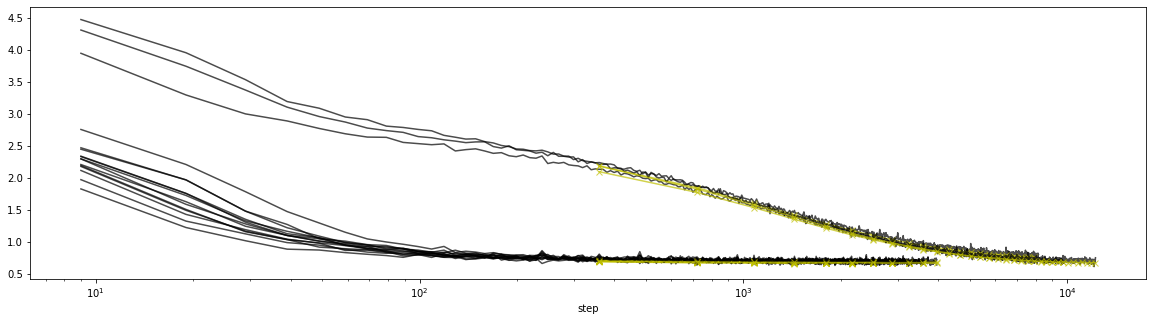

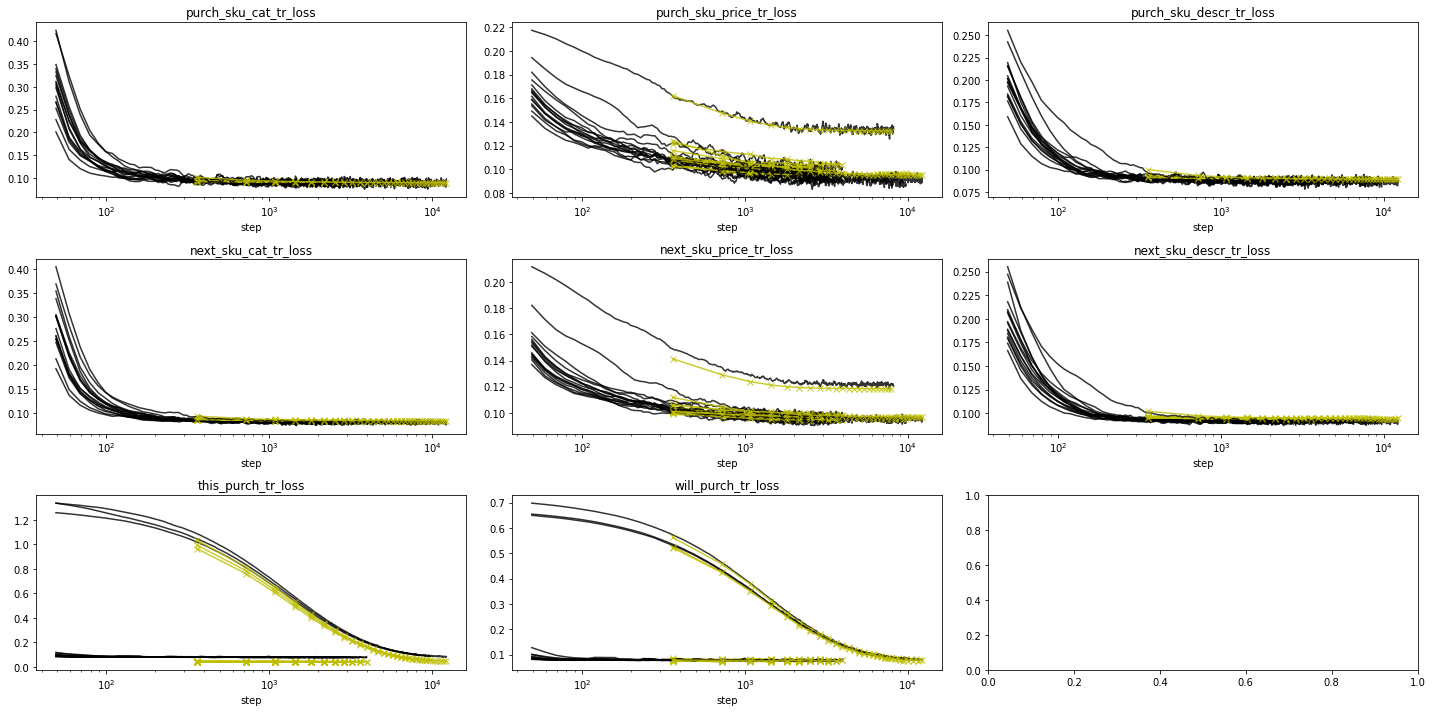

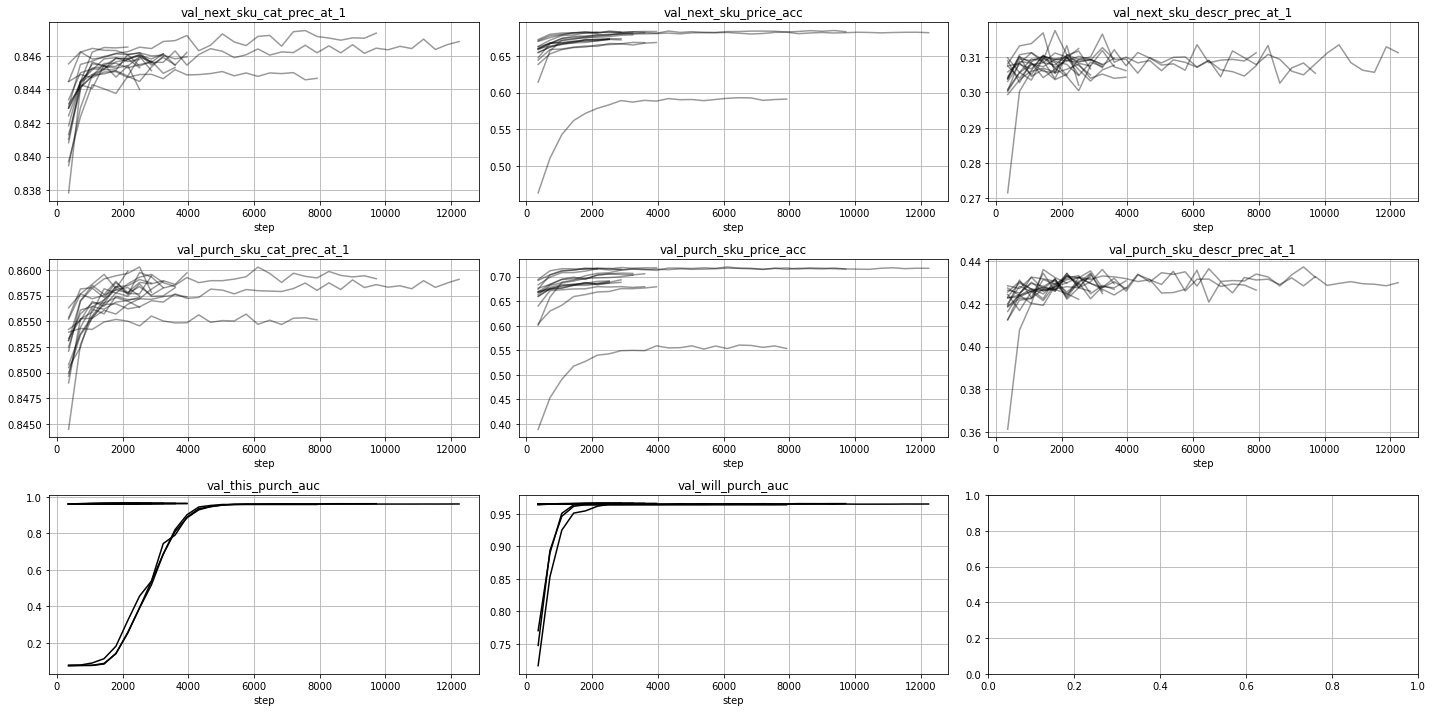

In [80]:
from core.sigir import plots
plots.plot_many_trains([t['df'] for t in trials if 'val_loss' in t['df'].columns], loss_logy=False)

In [81]:
def short_metric(m):
    return m.replace('val_', '').replace('next_sku', 'next').replace('prec_at_1', 'prec').replace('purch_sku', 'purch')

In [82]:
hr_metrics = [
     'val_next_sku_descr_prec_at_1',
     'val_next_sku_cat_prec_at_1',
     'val_next_sku_price_acc',
    
     'val_purch_sku_descr_prec_at_1',
     'val_purch_sku_cat_prec_at_1',
     'val_purch_sku_price_acc',
    
     'val_will_purch_auc',
     'val_this_purch_auc'
]

short_hr_metrics = list(map(short_metric, hr_metrics))
max_runs_df = build_runs_df(trials, mode='max').rename(columns=dict(zip(hr_metrics, short_hr_metrics)))
last_runs_df = build_runs_df(trials, mode='last').rename(columns=dict(zip(hr_metrics, short_hr_metrics)))

def heatmap(df=None, corr=None):
    if df is not None:
        assert corr is None
        corr = df[short_hr_metrics].corr('spearman')
    else:
        assert corr is not None
    plt.figure(figsize=(18,5))
    sns.heatmap(corr, annot=True)
    plt.plot([0, 8], [6, 6], lw=10, c='w')
    plt.plot([0, 8], [3, 3], lw=10, c='w')
    plt.plot([6, 6], [0, 8], lw=10, c='w')
    plt.plot([3, 3], [0, 8], lw=10, c='w')
    plt.xticks(rotation=0);
    

# Rolling

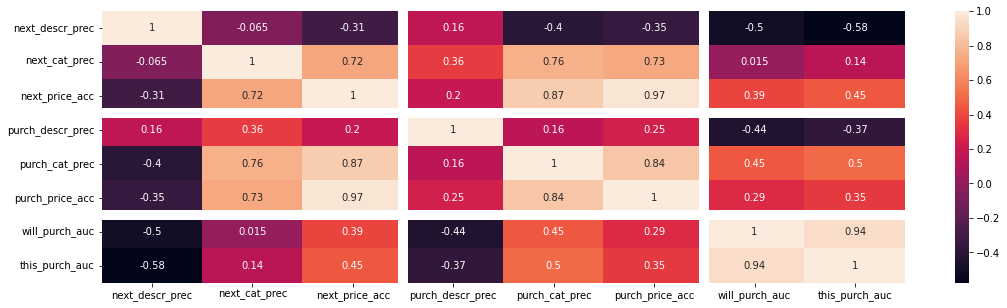

In [83]:
heatmap(max_runs_df)

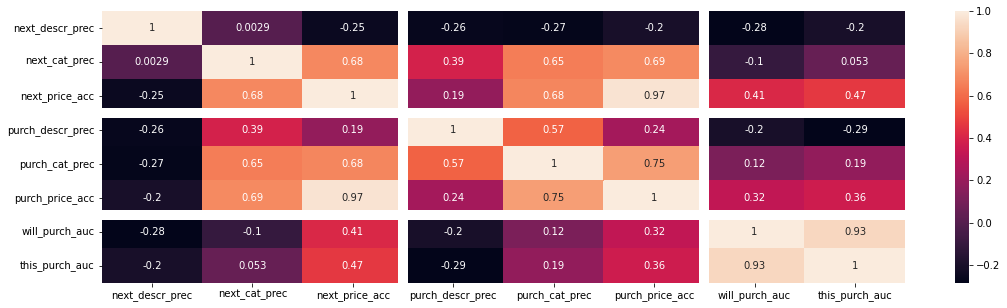

In [84]:
heatmap(last_runs_df)

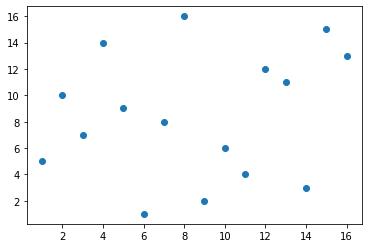

In [85]:
plt.scatter(last_runs_df['next_price_acc'].rank(), last_runs_df['purch_descr_prec'].rank())

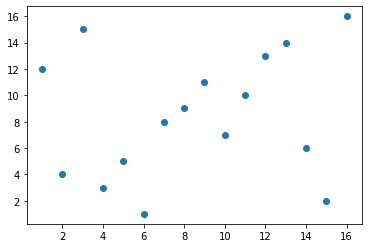

In [86]:
plt.scatter(max_runs_df['next_price_acc'].rank(), max_runs_df['purch_descr_prec'].rank())

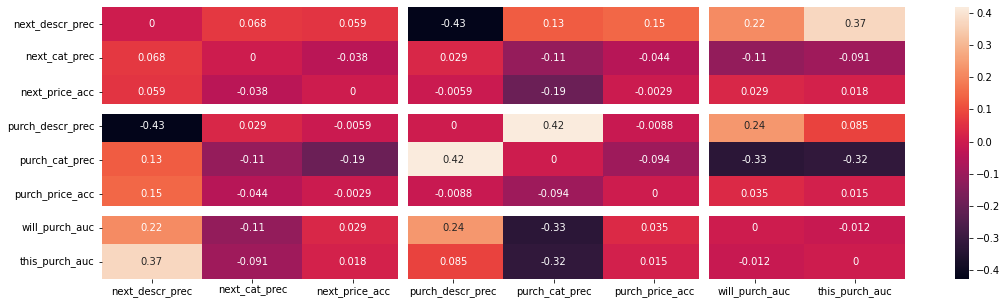

In [87]:
heatmap(corr=last_runs_df[short_hr_metrics].corr('spearman') - max_runs_df[short_hr_metrics].corr('spearman'))

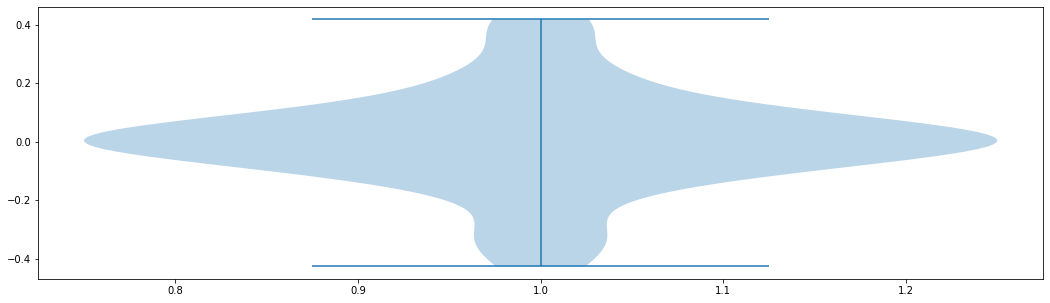

In [88]:
plt.figure(figsize=(18,5))
plt.violinplot((last_runs_df[short_hr_metrics].corr('spearman') - max_runs_df[short_hr_metrics].corr('spearman')).values.reshape(-1));

# GRU

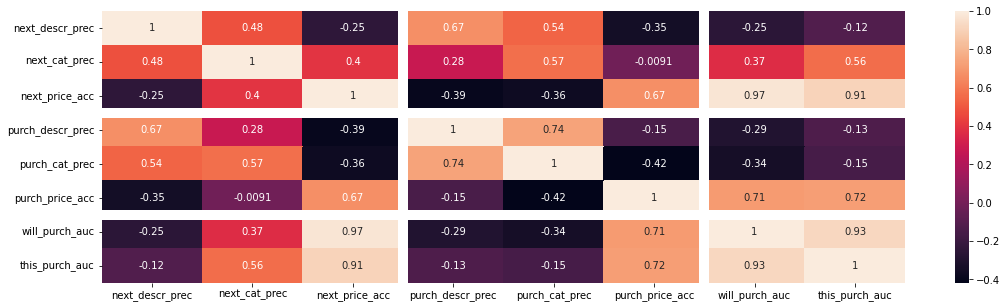

In [87]:
heatmap(max_runs_df)

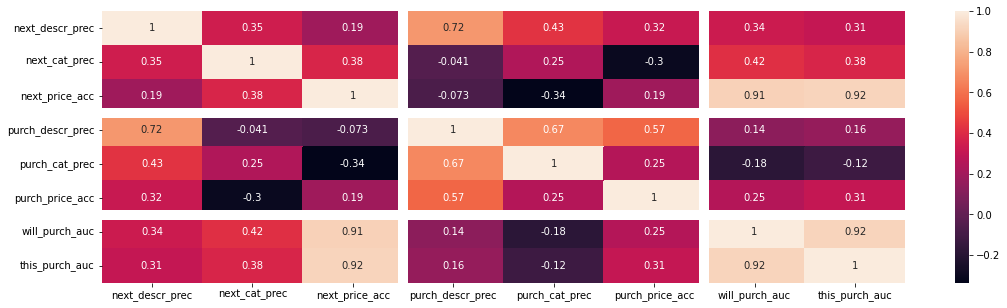

In [84]:
heatmap(last_runs_df)

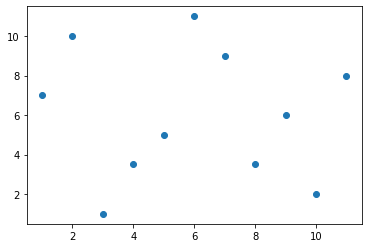

In [67]:
plt.scatter(last_runs_df['next_price_acc'].rank(), last_runs_df['purch_descr_prec'].rank())

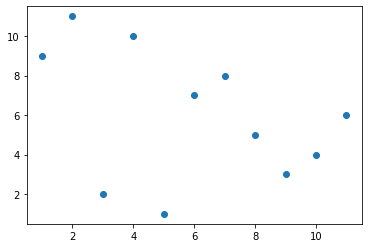

In [68]:
plt.scatter(max_runs_df['next_price_acc'].rank(), max_runs_df['purch_descr_prec'].rank())

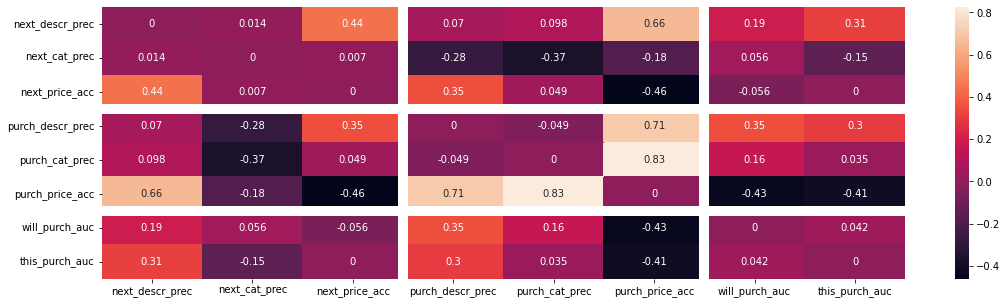

In [92]:
heatmap(corr=last_runs_df[short_hr_metrics].corr('spearman') - max_runs_df[short_hr_metrics].corr('spearman'))

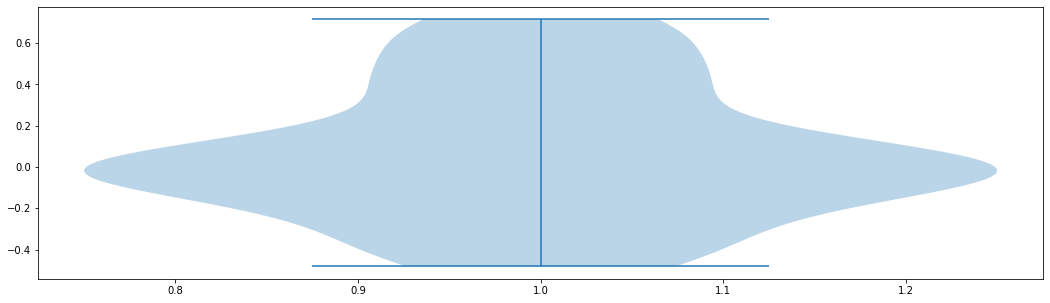

In [70]:
plt.figure(figsize=(18,5))
plt.violinplot((last_runs_df[short_hr_metrics].corr('spearman') - max_runs_df[short_hr_metrics].corr('spearman')).values.reshape(-1));

In [11]:
runs_df.overfit.max()

1.0229896668583927

In [12]:
hps = list(trials[0]['hp'])
relevant_cols = ['tr_loss', 'val_loss', 'min_val_loss'] + hps + hr_metrics

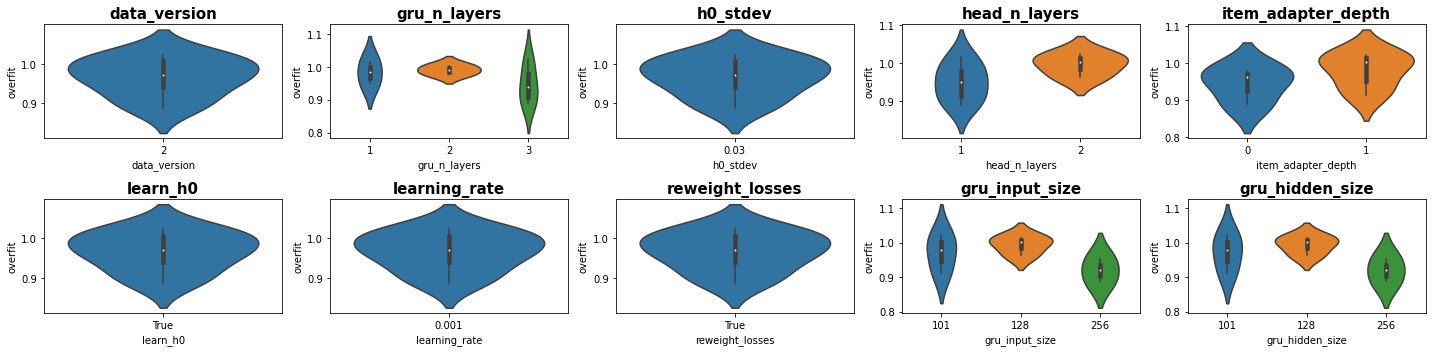

In [13]:
from IPython.display import display, display_markdown
plt.figure(figsize=(20,5))
for i, hp in enumerate(hps):
    ax=plt.subplot(2,len(hps) // 2,i+1)
    sns.violinplot(data=runs_df, x=hp, y='overfit', ax=ax)

    plt.title(hp, fontsize=15, fontweight='bold')
    plt.tight_layout()
plt.show()

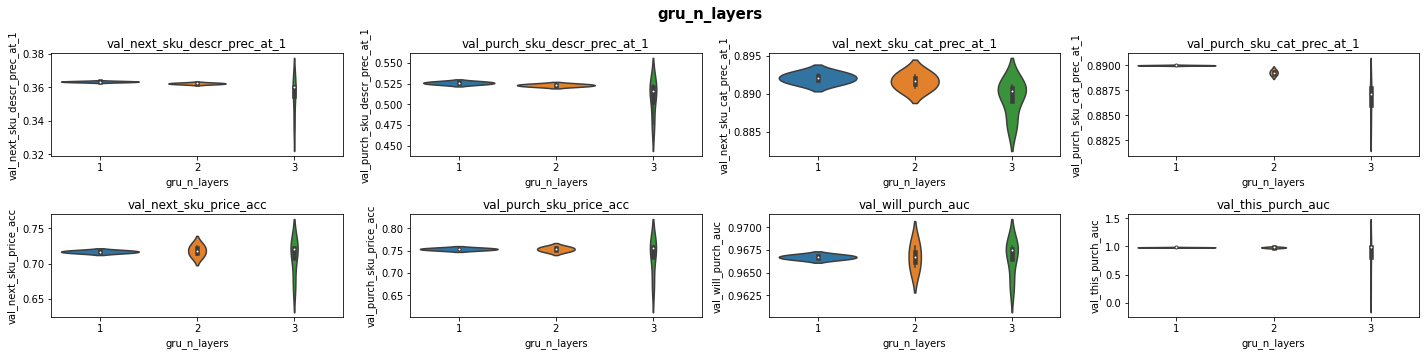

**Best metrics gruped by gru_n_layers**

gru_n_layers,1,2,3,rel_diff
val_next_sku_descr_prec_at_1,0.363693,0.362688,0.361041,0.007343
val_purch_sku_descr_prec_at_1,0.527237,0.524383,0.523445,0.007245
val_next_sku_cat_prec_at_1,0.892577,0.892451,0.891163,0.001587
val_purch_sku_cat_prec_at_1,0.890017,0.889442,0.888063,0.002200
val_next_sku_price_acc,0.718332,0.724533,0.724005,0.008632
val_purch_sku_price_acc,0.755555,0.757470,0.758294,0.003625
val_will_purch_auc,0.966900,0.967884,0.967891,0.001025
val_this_purch_auc,0.986527,0.988606,0.988642,0.002144


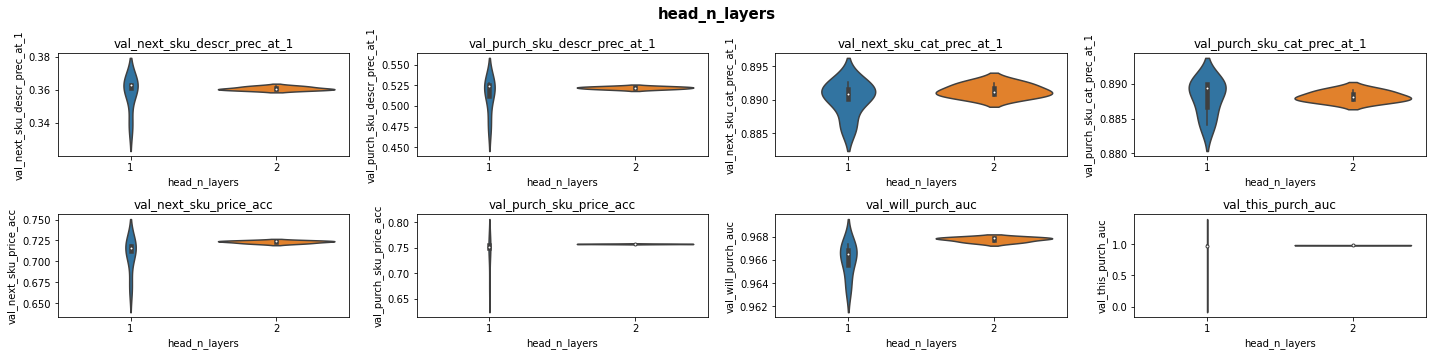

**Best metrics gruped by head_n_layers**

head_n_layers,1,2,rel_diff
val_next_sku_descr_prec_at_1,0.363693,0.362046,0.004548
val_purch_sku_descr_prec_at_1,0.527237,0.523445,0.007245
val_next_sku_cat_prec_at_1,0.892577,0.892451,0.000141
val_purch_sku_cat_prec_at_1,0.890017,0.889078,0.001056
val_next_sku_price_acc,0.720030,0.724533,0.006254
val_purch_sku_price_acc,0.755555,0.758294,0.003625
val_will_purch_auc,0.967385,0.967891,0.000522
val_this_purch_auc,0.986527,0.988642,0.002144


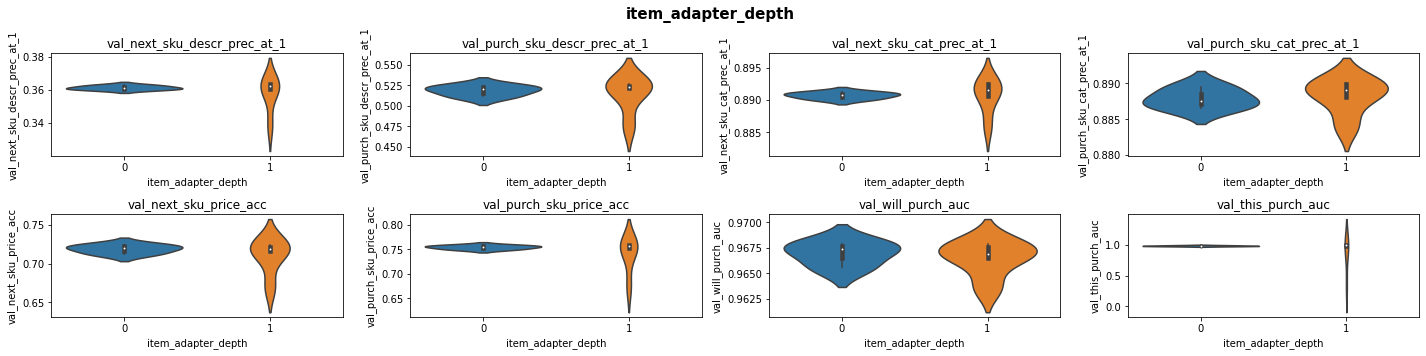

**Best metrics gruped by item_adapter_depth**

item_adapter_depth,0,1,rel_diff
val_next_sku_descr_prec_at_1,0.362688,0.363693,0.002770
val_purch_sku_descr_prec_at_1,0.524383,0.527237,0.005442
val_next_sku_cat_prec_at_1,0.891163,0.892577,0.001587
val_purch_sku_cat_prec_at_1,0.889442,0.890017,0.000646
val_next_sku_price_acc,0.724005,0.724533,0.000729
val_purch_sku_price_acc,0.757662,0.758294,0.000834
val_will_purch_auc,0.967891,0.967884,0.000007
val_this_purch_auc,0.988642,0.988606,0.000036


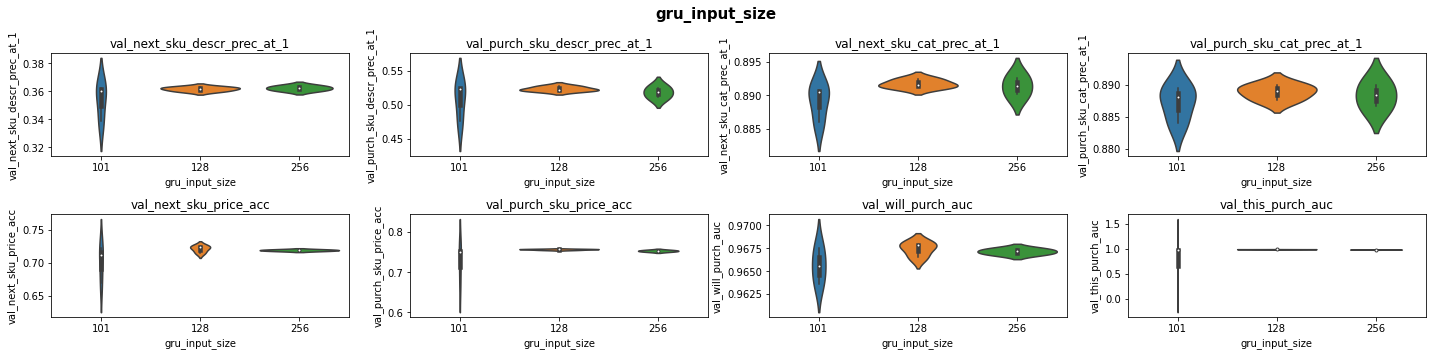

**Best metrics gruped by gru_input_size**

gru_input_size,101,128,256,rel_diff
val_next_sku_descr_prec_at_1,0.362688,0.363220,0.363693,0.002770
val_purch_sku_descr_prec_at_1,0.524383,0.527237,0.524747,0.005442
val_next_sku_cat_prec_at_1,0.890800,0.892451,0.892577,0.001995
val_purch_sku_cat_prec_at_1,0.889442,0.889979,0.890017,0.000646
val_next_sku_price_acc,0.721744,0.724533,0.720030,0.006254
val_purch_sku_price_acc,0.758294,0.757662,0.754827,0.004593
val_will_purch_auc,0.967548,0.967891,0.967385,0.000522
val_this_purch_auc,0.988072,0.988642,0.982313,0.006443


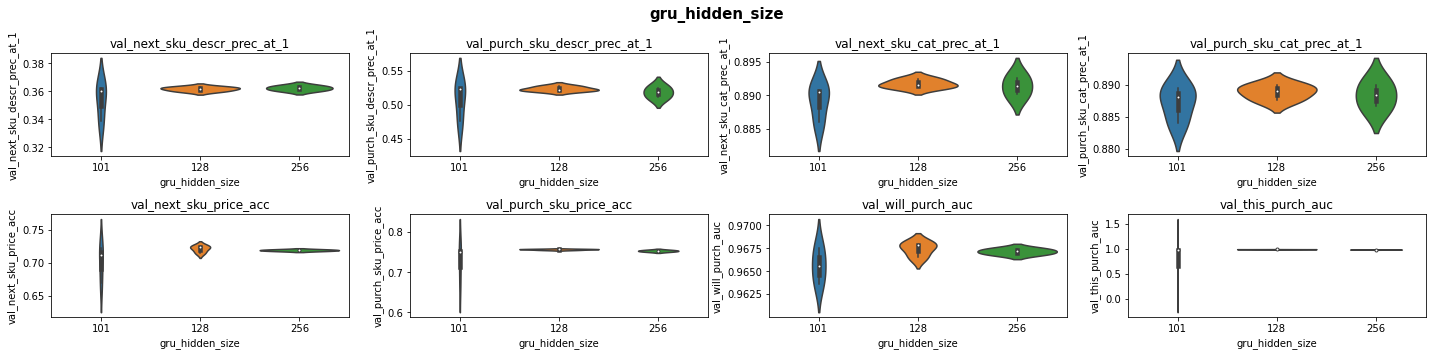

**Best metrics gruped by gru_hidden_size**

gru_hidden_size,101,128,256,rel_diff
val_next_sku_descr_prec_at_1,0.362688,0.363220,0.363693,0.002770
val_purch_sku_descr_prec_at_1,0.524383,0.527237,0.524747,0.005442
val_next_sku_cat_prec_at_1,0.890800,0.892451,0.892577,0.001995
val_purch_sku_cat_prec_at_1,0.889442,0.889979,0.890017,0.000646
val_next_sku_price_acc,0.721744,0.724533,0.720030,0.006254
val_purch_sku_price_acc,0.758294,0.757662,0.754827,0.004593
val_will_purch_auc,0.967548,0.967891,0.967385,0.000522
val_this_purch_auc,0.988072,0.988642,0.982313,0.006443


In [14]:
from IPython.display import display, display_markdown

for hp in hps:
    if len(runs_df[hp].unique()) == 1: continue
    plt.figure(figsize=(20,5))
    dfs = []
    for i, m in enumerate(hr_metrics):
        plt.subplot(2, 4, i+1)
        plt.title(m)
        sns.violinplot(data=runs_df, x=hp, y=m)
        dfs.append(runs_df.groupby(hp)[m].max())

    plt.suptitle(hp, fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    hp_df = pd.concat(dfs, axis=1).T
    M = hp_df.max(axis=1)
    m = hp_df.min(axis=1)
    hp_df['rel_diff'] = (M - m)/m
    display_markdown(f'**Best metrics gruped by {hp}**', raw=True)
    display(hp_df.style.background_gradient(axis=1, subset=hp_df.columns[:-1]))

In [53]:
pd.options.display.max_columns = 1000

In [71]:
hps = list(trials[0]['hp'])
runs_df[
   ['log', 'score'] + hr_metrics + hps 
].head(10)

,log,score,val_next_sku_descr_prec_at_1,val_purch_sku_descr_prec_at_1,val_next_sku_cat_prec_at_1,val_purch_sku_cat_prec_at_1,val_next_sku_price_acc,val_purch_sku_price_acc,val_will_purch_auc,val_this_purch_auc,data_version,gru_n_layers,h0_stdev,head_n_layers,item_adapter_depth,learn_h0,learning_rate,reweight_losses,gru_input_size,gru_hidden_size
2,logs/grid_search_shorter_seqs/default/version_2,0.087988,0.364847,0.525705,0.891490,0.890151,0.716146,0.757087,0.966385,0.985436,2,1,0.03,1,1,True,0.001,True,128,128
0,logs/grid_search_shorter_seqs/default/version_0,0.087655,0.365261,0.523330,0.892301,0.890074,0.718785,0.752892,0.967048,0.983525,2,1,0.03,1,1,True,0.001,True,256,256
3,logs/grid_search_shorter_seqs/default/version_3,0.087348,0.361609,0.521702,0.891214,0.887431,0.722020,0.757662,0.967688,0.988247,2,3,0.03,2,1,True,0.001,True,101,101
1,logs/grid_search_shorter_seqs/default/version_1,0.086998,0.363078,0.524000,0.891013,0.889634,0.714125,0.754080,0.965797,0.978261,2,2,0.03,1,0,True,0.001,True,101,101
4,logs/grid_search_shorter_seqs/default/version_4,0.083244,0.357007,0.500364,0.889623,0.885803,0.718049,0.756781,0.966552,0.831453,2,3,0.03,1,0,True,0.001,True,256,256


In [18]:
np.exp(trials[0]['df'][log_var_cols].dropna().iloc[-1])

log_var_next_sku_descr     0.143329
log_var_next_sku_price     0.072835
log_var_next_sku_cat       0.094092
log_var_purch_sku_descr    0.096807
log_var_purch_sku_price    0.077149
log_var_purch_sku_cat      0.108893
log_var_will_purch         0.102306
log_var_this_purch         0.104070
Name: 406, dtype: float64

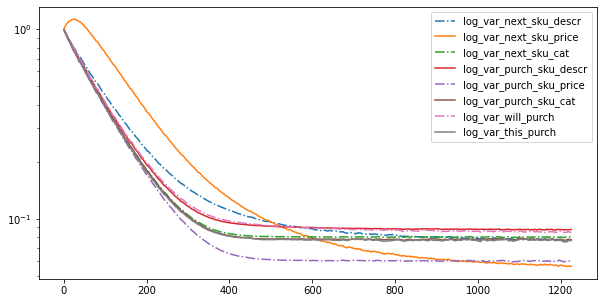

In [70]:
from itertools import cycle
fig = plt.figure(figsize=(10,5))
log_var_cols = [c for c in df.columns if 'var' in c]
styles = cycle('-. -'.split())
for c in log_var_cols:
    np.exp(df[c].dropna()).plot(style=next(styles), label=c)
plt.legend(loc='best')
plt.yscale('log')

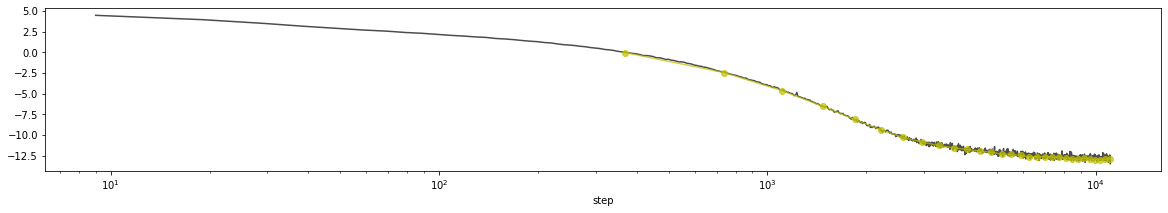

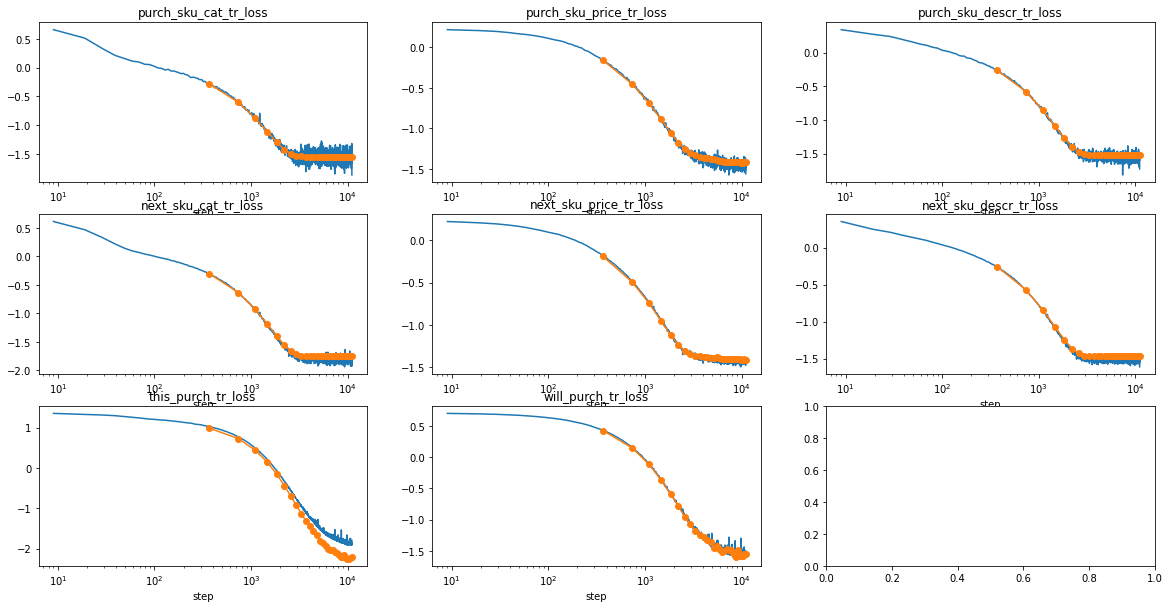

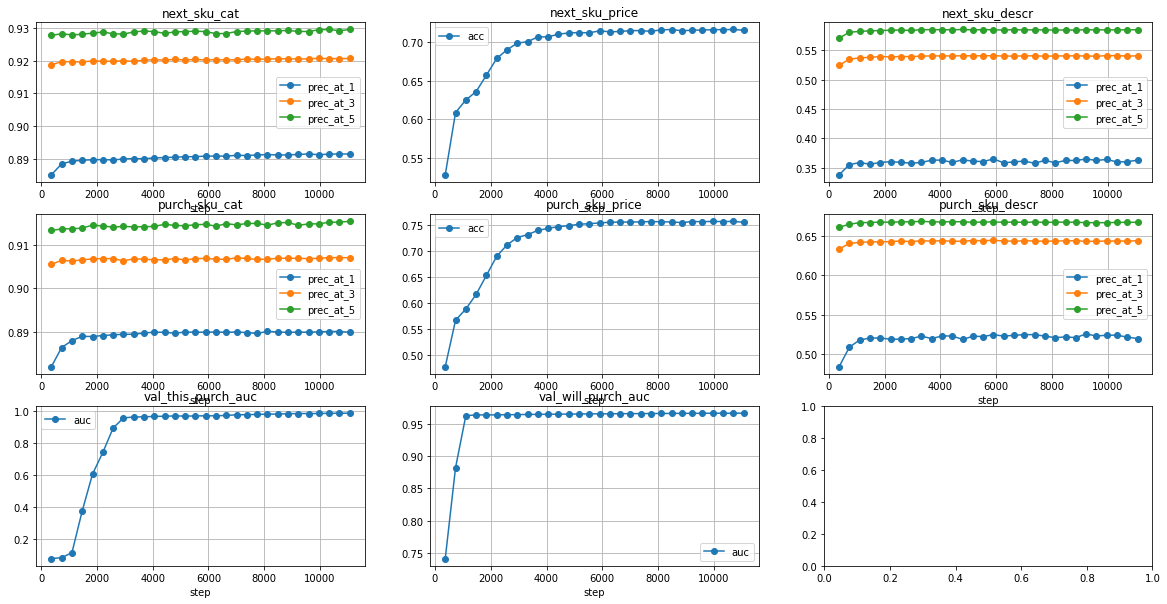

In [56]:
df = pd.read_csv(fs.join(runs_df.iloc[0]['log'], 'metrics.csv'))
plots.plot_metrics(df, loss_logy=False)

In [31]:
top_runs = runs_df[:20]
worst_runs = runs_df[20:]

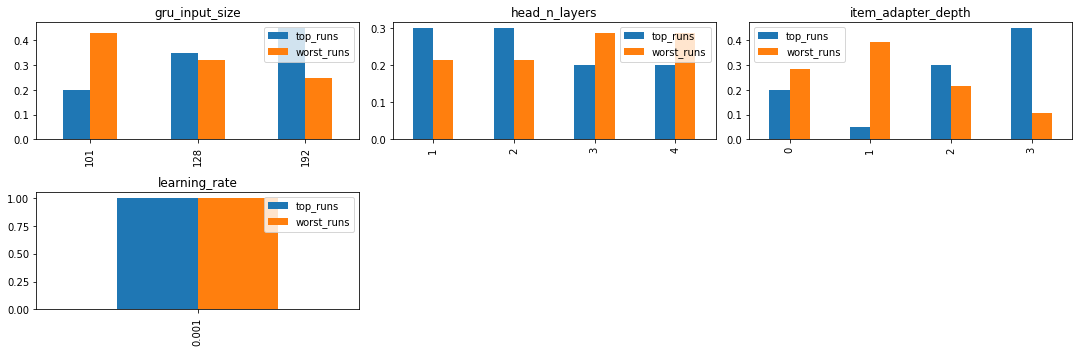

In [32]:
plt.figure(figsize=(15,5))
for i, hp in enumerate(hps):
    plt.subplot(2,3,i+1)
    d = pd.DataFrame({'top_runs': top_runs[hp].value_counts(normalize=True),
                      'worst_runs': worst_runs[hp].value_counts(normalize=True)})
    d.plot.bar(ax=plt.gca())#(color='g', label='worst_runs')
#     sns.kdeplot(top_runs[hp], label='top_runs', color='r')
#     sns.histplot(worst_runs[hp], label='worst_runs')
    plt.title(hp)
    plt.legend()
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,10))
for i, metric in enumerate(hr_metrics):
    plt.subplot(3,3, i+1)
    plt.title(metric)
    plt.violinplot([gru_runs_df[metric], rolling_runs_df[metric]], showmedians=True)
    plt.xticks([1,2], ['gru', 'rolling'])
plt.tight_layout()

# Compare runs

In [139]:
runs_df = {k: build_runs_df(load_trials(v)) for k, v in trial_fnames.items()}

138
48
46
12
36
84


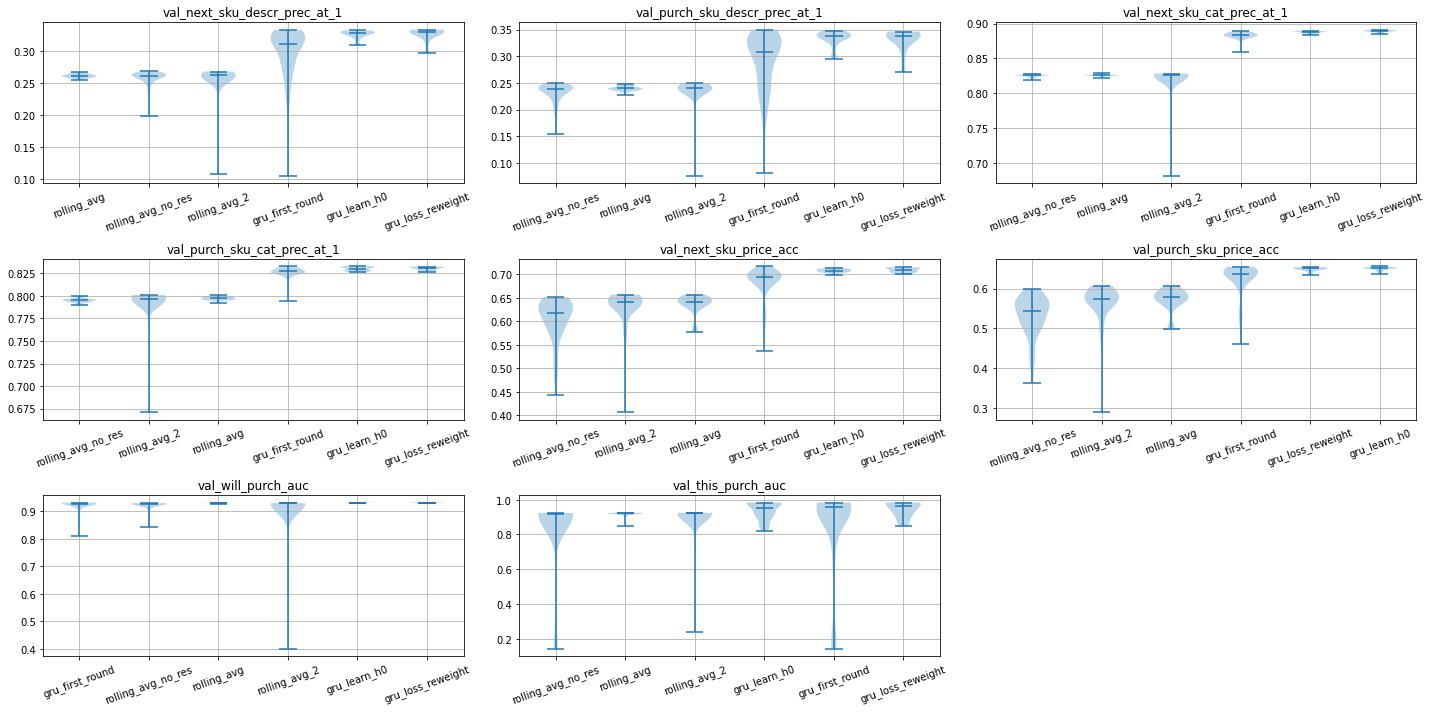

In [140]:
trial_names = list(runs_df)
plt.figure(figsize=(20,10))
for i, metric in enumerate(hr_metrics):
    plt.subplot(3,3, i+1)
    plt.title(metric)
    to_plot = sorted([(t, runs_df[t][metric]) for t in trial_names], key=lambda x: x[1].median())
    labels, data = zip(*to_plot)
    plt.violinplot(data, showmedians=True)
    plt.xticks(range(1, len(trial_names)+1), labels, rotation=20)
    plt.grid()
plt.tight_layout()